In [37]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend

In [38]:
pas="1"
config="4"

In [39]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#dymin=-.984
#dymax=.9
#W2max=1.75
#dybgmin=-1.2
#dybgmax=1.2
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -1
W2max: 1.9
dxmin: -0.403
dxmax: 0.406
dymin: -0.98
dymax: 0.98
dybgmin: -1.3
dybgmax: 1.2
Coin Min: 81 Coin Max: 100


In [56]:
fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")
def Function_BBCalP(config):
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(1)

    
    #-------------------------------------
    rootfilenp = (f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
    rootfilep = (f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root")
    
    
    C = TChain("Tout")
    
    C.Add(rootfilenp)

    dx_p, dy_p, W2_p, coin_p,fnucl  = array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    dx_np, dy_np, W2_np, coin_np, weight,px,py,pz = array.array('d', [0]),array.array('d', [0]),array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    helicity_p, IHWP_p, runnum_p = array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    helicity_np, IHWP_np, runnum_np= array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    
    # Disable all branches initially
    C.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time","trPx","trPy","trPz"]
    
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    

    
    # Set branch addresses
    C.SetBranchAddress("dx", dx_np)
    
    C.SetBranchAddress("trPx", px)
    C.SetBranchAddress("trPy", py)
    C.SetBranchAddress("trPz", pz)
   
    
    C.SetBranchAddress("dy", dy_np)
    C.SetBranchAddress("W2", W2_np)
    C.SetBranchAddress("helicity", helicity_np)
    C.SetBranchAddress("IHWP", IHWP_np)
    C.SetBranchAddress("coin_time", coin_np)
    C.SetBranchAddress("runnum", runnum_np)
    
    # Assuming the variables are already defined or loaded from the ROOT file
    nbins=100   
    xmin, xmax = -4, 2.5
    if config=="2":
        xmin=-5.5
        xmax=2.8
    hptotal=TH1F("hptotal","Total Scattered Electron Momentum",nbins,1,5)
    hetotal=TH1F("hptotal","Total Scattered Electron Momentum",nbins,1,5)

    hdx_total_data = TH1F("hdx_total_data", "#Deltax;#Deltax;Entries", nbins, xmin, xmax)
    hdx_total_sim = TH1F("hdx_total_sim", "#Deltax;#Deltax;Entries", 100, -6, 4)
    hdx_p = TH1F("hdx_p", "#Deltax for helicity +1;#Deltax;Entries", 100, -6, 4)
    hdx_m = TH1F("hdx_m", "#Deltax for helicity -1;#Deltax;Entries", 100, -6, 4)
    
    hdx_data_plus = TH1F("hdx_data_plus", "", nbins, xmin, xmax)
    hdx_data_minus = TH1F("hdx_data_minus", "", nbins, xmin, xmax)
    hdx_sim_p = TH1F("hdx_sim_p", "", nbins, xmin, xmax)
    hdx_sim_n = TH1F("hdx_sim_n", "", nbins, xmin, xmax)
    hdx_bg_data = TH1F("hdx_bg_data", "", nbins, xmin, xmax)
    hdx_bg_data_plus = TH1F("hdx_bg_data_plus", "", nbins, xmin, xmax)
    hdx_bg_data_minus = TH1F("hdx_bg_data_minus", "", nbins, xmin, xmax)
    

    nEntries_np = C.GetEntries()
    for i in range(nEntries_np):
        C.GetEntry(i)
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue
            
#____________CUTS_______________________________      
        ycut = dymin < dy_np[0] < dymax
        xcut = dxmin < dx_np[0] < dxmax
        bgycut=dybgmin<dy_np[0]<dybgmax
        coin_cut = coinmin < coin_np[0] < coinmax
        W2cut=W2min < W2_np[0] < W2max
#________________________________________________     

        if coin_cut and W2cut and runnum_np[0] > 2165 and not bgycut:
            hdx_bg_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_bg_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_bg_data_minus.Fill(dx_np[0])

        if coin_cut and W2cut and runnum_np[0] > 2165 and ycut and xcut:
            hdx_total_data.Fill(dx_np[0])
            bigP=sqrt(px[0]**2+py[0]**2+pz[0]**2)
            hptotal.Fill(bigP)
            hetotal.Fill(sqrt(bigP**2+.000511**2))
            if helicity_np[0] == 1:
                hdx_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_data_minus.Fill(dx_np[0])
    return Function_HIST2NP(hptotal),Function_HIST2NP(hetotal)


Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN4_sbs100p_nucleon_np_model2.root
File Exists: True


In [63]:
Phist2,Ehist2=Function_BBCalP("2")
Phist3,Ehist3=Function_BBCalP("3")
Phist4,Ehist4=Function_BBCalP("4")



Error in <THashList::Delete>: A list is accessing an object (0x9e07f70) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x9c36880) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x9588c40) already deleted (list name = THashList)


Text(0.5, 0, 'Energy (GeV)')

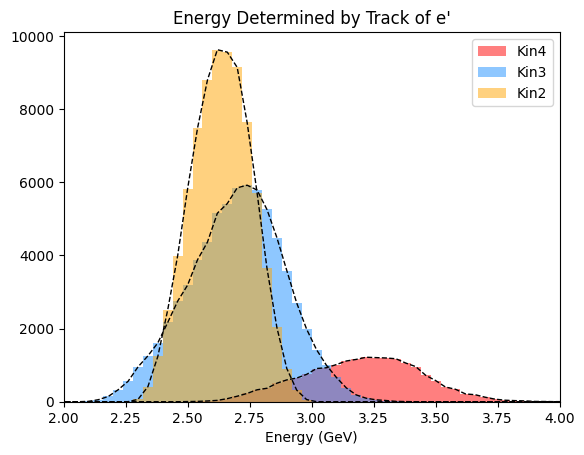

In [70]:
lw=1
bin_centers,bin_contents=Phist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="red",label="Kin4")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
lw=1
bin_centers,bin_contents=Phist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="dodgerblue",label="Kin3")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
lw=1
bin_centers,bin_contents=Phist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="orange",label="Kin2")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.title("Energy Determined by Track of e'")
plt.xlim(2,4)
plt.legend(loc='upper right')
plt.xlabel("Energy (GeV)")

Text(0.5, 0, 'Energy (GeV)')

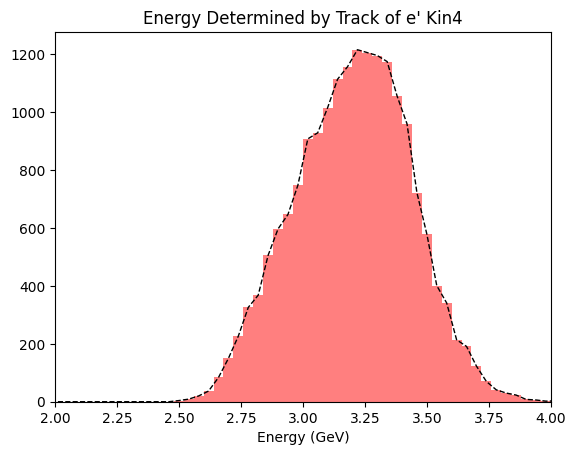

In [68]:
bin_centers,bin_contents=Phist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="red",label="Kin4")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.xlim(2,4)
plt.title("Energy Determined by Track of e' Kin4")
plt.xlabel("Energy (GeV)")